In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.shape

(404290, 6)

In [4]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
317577,317577,442802,442803,Is it metabolically advantageous for neurons t...,Can fire start in the body from metabolism?,0
157687,157687,246498,246499,What is 1?,When does 1 + 1 + 1 = 1?,0
309155,309155,174839,433104,What do girls do when they are horny?,When do girls get horny?,0
355246,355246,6799,20672,What are ways I can make money online?,How do you make easy money online?,1
115628,115628,34041,188522,Could a president run for a third term after t...,If the vice president of the U.S. finishes out...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
#missing value
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# duplicated row check
df.duplicated().sum()

0

In [8]:
# Duplicate Q vs Non duplicate Q
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [9]:
# percentage count
(df['is_duplicate'].value_counts() / df['is_duplicate'].count())*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

<AxesSubplot:>

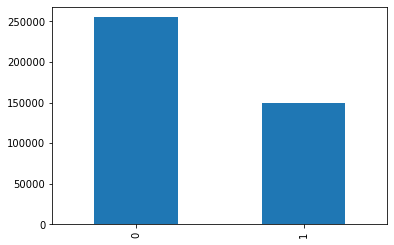

In [10]:
# plot 
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# unique and repeated Q
Qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
uniqueQ = len(np.unique(Qids))
repeatedQ = np.sum(Qids.value_counts() > 1)

print("Total unique questions : ", uniqueQ)

print("Total repeated questions : ", repeatedQ)

Total unique questions :  537933
Total repeated questions :  111780


In [12]:
# maximun number of time single Q repeated count
print("Maximun number of time single Q repeated count : ",max(Qids.value_counts()))


Maximun number of time single Q repeated count :  157


<AxesSubplot:>

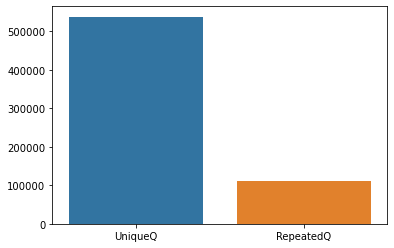

In [13]:
# Plot unique vs repeated
x = ["UniqueQ","RepeatedQ"]
y = [uniqueQ,repeatedQ]
sns.barplot(x,y)

Text(0, 0.5, 'Number of Q')

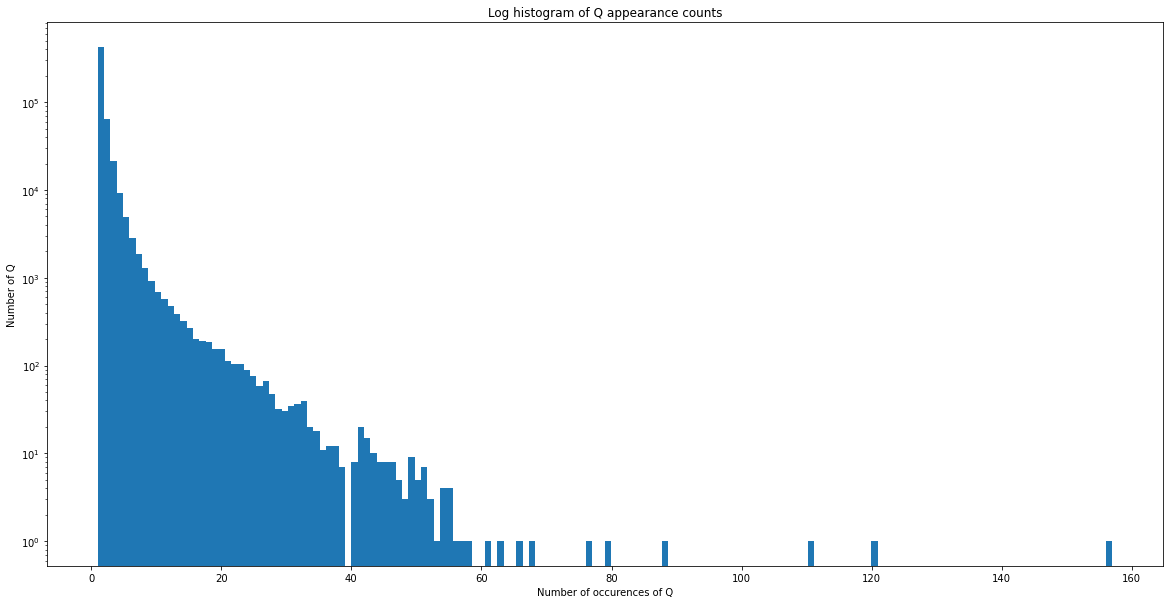

In [14]:
QValues = Qids.value_counts()
QValues = QValues.values

plt.figure(figsize= (20,10))
plt.hist(QValues , bins =160 , log = True)
plt.title("Log histogram of Q appearance counts")
plt.xlabel("Number of occurences of Q")
plt.ylabel("Number of Q")

In [15]:
# filling null value with " "
df = df.fillna("")
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
# # Basic Feature Extraction
# freq_q1 = frequency of Q1
# freq_q2 = frequency of Q2
# q1Len , q2Len = length of Q's
# wordsQ1 , wordsQ2 = number of words in Q's
# wordCommon = number of common unique words in Q's
# wordTotal = number of words in Q's
# wordShare = wordCommon/wordTotal
# SumFreq = Sum of freq_q1 + freq_q2
# FreqDiff = diff btw Q1 , Q2


In [17]:
import os
from os import path
if os.path.isfile('Df_without_preprocessed_train.csv'):
    df = pd.read_csv("Df_without_preprocessed_train.csv",encoding = "latin-1")
else:
#     df = pd.read_csv("train.csv")
#     df = df.fillna("")
    df["freq_q1"] = df.groupby('qid1')['qid1'].transform("count")
    df["freq_q2"] = df.groupby('qid2')['qid2'].transform("count")
    df['q1Len'] = df["question1"].str.len()
    df['q2Len'] = df["question2"].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
#     df['wordQ1'] = df['question1'].apply(lambda row: len(row.split(" ")))
#     df['wordQ2'] = df['question2'].apply(lambda row: len(row.split(" ")))
    
    
    def normalized_word_common(row):
        w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
        w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
        return 1.0 * len(w1 & w2)
    df['wordCommon'] = df.apply(normalized_word_common , axis = 1)
    
    def normalized_word_total(row):
        w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
        w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
        return 1.0 * (len(w1) + len(w2))
    df['wordTotal'] = df.apply(normalized_word_total , axis = 1)
    
    def normalized_word_share(row):
        w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
        w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['wordShare'] = df.apply(normalized_word_share , axis = 1)
    
    df['freq_q1+q2'] = df['freq_q1'] + df['freq_q2']
    df['freq_q1-q2'] = abs(df['freq_q1'] - df['freq_q2'])
    
    df.to_csv('Df_without_preprocessed_train.csv', index = False)
# df = df.fillna("")
df.head()        

,id,qid1,qid2,question1,question2,is_duplicate,freq_q1,freq_q2,q1Len,q2Len,q1_n_words,q2_n_words,wordCommon,wordTotal,wordShare,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2
